# Modularity comm dectection
This algorithm works for different types of networks.

We used this command on the undirected weighted network (from igraph):
clusters = G.community_multilevel(weights='weight', return_levels=False)


In [17]:
import os
from graph_tool.all import *
import codecs
from collections import defaultdict, OrderedDict
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
from igraph import *
from scipy.stats.stats import pearsonr
from scipy import stats
import seaborn as sns
import pandas as pd
import math
import json
plt.style.use('seaborn-white')
sns.set(font_scale=2) 
sns.set_style("white")

In [18]:
WORKING_FOLDER = '../../../DATA/FIN/Modularity'
os.chdir(WORKING_FOLDER)
f_in_graph = 'mention_graph_weights.dat'

f_in_Modularity_output_comm = 'modularity_partition_names.tab'

# Read in data

In [19]:
def read_in_node_names():
    f = open('mutual_unweighted_node_names', 'r')
    node_names = defaultdict(int)
    for line in f:
        if line[0] == '#':
            continue
        node_id, node_name = line.split()
        node_names[int(node_id)] = int(node_name)
    return node_names

In [20]:
# returns a dict with nodes ids per community in each value
# dict keys are just community ids in returned order 
def read_modularity_output():  
    input_file = codecs.open(f_in_Modularity_output_comm, 'r', encoding='utf8')
    output = defaultdict(list)
    num_COMM = 0
    for line in input_file:
        line = line.split()
        output[num_COMM] = [int(str(el)) for el in line]
        num_COMM += 1
                  
    return output

read_modularity_output()

defaultdict(list,
            {0: [29026, 8787],
             1: [9177, 25816],
             2: [9992],
             3: [4580],
             4: [22829, 18506],
             5: [20508, 14430],
             6: [17288],
             7: [682],
             8: [26722, 3921],
             9: [9215, 7255],
             10: [20247, 17586],
             11: [6639],
             12: [6553, 6284],
             13: [21926, 9269, 2369, 24169],
             14: [1965, 9711, 28637, 5131, 17994],
             15: [17767, 9469, 21035],
             16: [8440],
             17: [18001],
             18: [27892, 3406],
             19: [18894, 18063],
             20: [1847, 14494],
             21: [4833, 20219],
             22: [21081, 23708, 11675],
             23: [10910, 27649],
             24: [16628, 15929],
             25: [11449, 7441],
             26: [27494, 2504],
             27: [7964, 4542],
             28: [5864, 16],
             29: [23793, 27834, 23117],
             30: [1212],


In [21]:
def read_in_top_communities(sizeN):
    ordered_communities = OrderedDict(sorted(read_modularity_output().items(), key=lambda t:len(t[1]), reverse=True))
    top_communities = OrderedDict(x for x in ordered_communities.items() if len(x[1])>sizeN)
    return top_communities

In [22]:
# returns a set of communities in which each node belongs to
def find_nodes_COMM():
    nodes_COMM = defaultdict(list)
    output = read_BigClam_output()
    for comm in output.keys():
        for node in output[comm]:
            nodes_COMM[node].append(comm)
            
    for node in nodes_COMM:
            nodes_COMM[node] = list(set(nodes_COMM[node]))
    return nodes_COMM

In [23]:
# a helper function to show us info when print info is true
# otherwise returns only the list of community sizes
def num_and_sizes_modularity_COMM(print_info=False):
    num_COMM = 0
    COMM_sizes = []
    ALL_users = defaultdict(int)
    COMM = read_modularity_output()
    num_COMM = len(COMM.keys())
    for comm in COMM:
        COMM_sizes.append(len(COMM[comm]))
        for el in COMM[comm]:
            ALL_users[el] = 1
    if print_info:
        print 'Modularity has output: %d COMM ' % (num_COMM)
        print 'Their sizes in increasing order:'
        print sorted(COMM_sizes)
        print 'Total number of users in COMM:'
        print len(ALL_users.keys())
        print 'Total size of COMM:'
        print sum(COMM_sizes)
    return COMM_sizes
    return COMM_sizes

In [24]:
num_and_sizes_modularity_COMM(print_info=True)

Modularity has output: 2141 COMM 
Their sizes in increasing order:
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

[2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 4,
 5,
 3,
 1,
 1,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 4,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 5,
 2,
 3,
 2,
 1,
 2,
 3,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 3,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 3,
 1,
 2,
 2,
 2,
 3,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 3,
 2,
 2,
 2,
 1,
 2,
 3,
 2,
 1,
 1,
 1,
 1,
 3,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 2869,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 14,
 3,
 2,
 2,
 1,
 3,
 1,
 2,
 2,
 2,
 2,
 3,
 486,
 2,
 3,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 3,
 2,
 2,
 2,
 1,
 2,
 4,
 2,
 2,
 3,
 1,
 2,
 2,
 2,
 2,
 2,
 5,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 3,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 3,
 17,
 380,
 519,
 3,
 2,
 2,
 

In [25]:
# here this function is just a test if all is ok
# returns the node membership for each node
# i.e., in how many communities it participates
def find_nodes_in_more_COMM(print_info=False):
    nodes_num_COMM = defaultdict(int)
    COMM = read_modularity_output()
    for comm in COMM:
        for node in COMM[comm]:
            nodes_num_COMM[int(node)] += 1
    all_nodes = read_in_node_names().values()
    cnt_singletons = 0
    
    for node in all_nodes:
        if node not in nodes_num_COMM:
            cnt_singletons += 1
    if print_info:
        print len(all_nodes), len(nodes_num_COMM.keys())
        print 'I found nodes out of communities ', cnt_singletons
    #nodes_num_COMM2 = {node: nodes_num_COMM[node] if nodes_num_COMM[node] < 10 else 10 for node in nodes_num_COMM}
    sorted_nodes_num_COMM = OrderedDict(sorted(nodes_num_COMM.items(), key=lambda t:t[1], reverse=True))
    global N_overlap_comm
    N_overlap_comm = sorted_nodes_num_COMM.items()[0][1]
    #print sorted_nodes_num_COMM
    return sorted_nodes_num_COMM


find_nodes_in_more_COMM(print_info=True)
print N_overlap_comm
N_overlap_comm = 20

26717 26717
I found nodes out of communities  0
1


# Let us visualize the community structure

In [28]:
# plots complementary CDF for the comm sizes
# in log-log scale
def plot_ccdf_comm_sizes():
    COMM_sizes = num_and_sizes_modularity_COMM()
    data = np.array(COMM_sizes)
    sorted_data = np.sort(data)
    yvals=1-np.arange(len(sorted_data))/float(len(sorted_data)-1)
    plt.plot(sorted_data,yvals,color='r', label='Louvain')
    plt.yscale('log')
    plt.ylabel('complementary CDF')
    plt.xscale('log')
    plt.xlabel('community size')
    plt.legend()
    plt.savefig('ccdf_comm_sizes.jpg')
    plt.show()

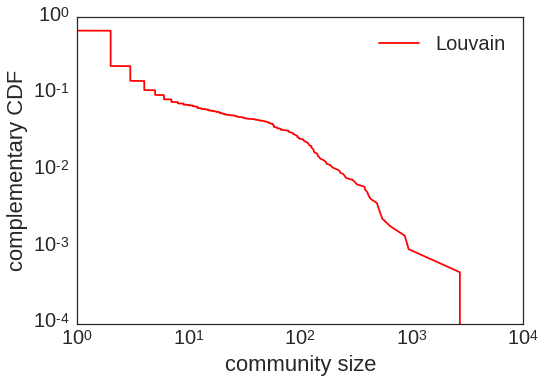

In [29]:
plot_ccdf_comm_sizes()

# Now we add SR values and graph into the story
We want to see does community size correlate with average SR

In [13]:
# reads in the graph using igraph and Ncol format, i.e., edge list
# with weights being the SR on the edges
def read_in_SR_graph():
    #G = Graph.Read_Ncol('undirected_mention_graph_with_SR.csv', directed=False, weights=True)
    #G = read("test", format="ncol", directed=False, weights=True)
    G = Graph.Read_Ncol('directed_mention_graph_with_SR_NCOL_edgelist', directed=True, weights=True, names=True)
    #print G.summary()
    G.to_undirected(mode="collapse", combine_edges=min)
    #print G.summary()
    #G.simplify(combine_edges=None)
    #print G.summary()
    return G
read_in_SR_graph()

Next function uses igraph to first find a subgraph induced by the community
and to then calculate average SR on its edges. It is relatively fast given that
other implementation I took (iterating through nodes) were really slow.

In [14]:
# find average SR between the connected nodes
# in the subgraph of G induced by the nodes
def find_avg_SR(G, nodes):
    node_SR_list = []
    node_indices = []
    for el in nodes:
        n = G.vs.select(name = str(el))[0]
        n = n.index
        node_indices.append(n)
    edges = G.es.select(_within = node_indices)
    for e in edges:
        w = e['weight']
        node_SR_list.append(w)
    avg_SR = np.mean(np.array(node_SR_list))
    std_SR = np.std(np.array(node_SR_list))
    return (avg_SR, std_SR)      

We now combine the BigClam output and previous function
to find avergage SR per community

In [15]:
def avg_SR_per_COMM_size():
    BigClam_output = read_modularity_output()
    G = read_in_SR_graph()
    size_vs_SR = defaultdict(int)
    for comm_nodes in BigClam_output.values():
        size_vs_SR[len(comm_nodes)] = find_avg_SR(G, comm_nodes)
    sorted_size_vs_SR = OrderedDict(sorted(size_vs_SR.items(), key=lambda t:t[0], reverse=True))
    return size_vs_SR

We now plot the distribution. There is *no* correlation.

In [16]:
def scatterplot_avg_SR_per_COMM_size():
    size_vs_SR = avg_SR_per_COMM_size()
    x = np.array(size_vs_SR.keys())
    y = np.array([s[0] for s in size_vs_SR.values()])
    e = np.array([s[1] for s in size_vs_SR.values()])
    print 'Corrcoef',  pearsonr(x, y)
    plt.scatter(x,y, label='mean SR per comm')
    plt.xlabel('comm size')
    plt.ylabel('mean SR')
    plt.xscale('log')
    #plt.legend(loc='best',frameon=False)
    plt.show()

Corrcoef (-0.2096340780473733, 0.026528881689800013)


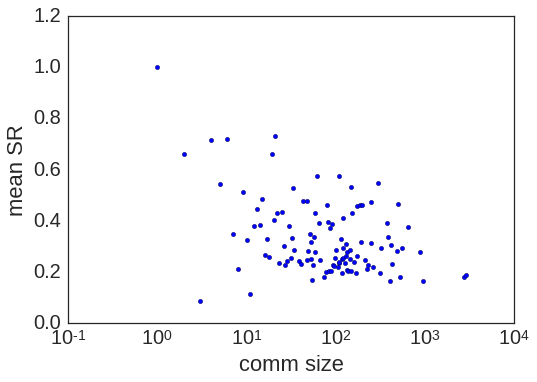

In [17]:
scatterplot_avg_SR_per_COMM_size()

 Semantic capital

In [10]:
def read_sem_capital(f_name='user_entities.tab', tname='entities'):
    f = open(f_name, "r")
    cap = defaultdict(int)
    cnt = 0
    for line in f:
        if tname == 'sentiment':
            (vid, vn, val) = line.split('\t')
            val = float(val)
        else:
            (vid, val) = line.split('\t')
            val = float(val)
        cap[vid] = val
        cnt += 1
    return cap

In [11]:
def find_avg_SEM_CAP(sem_cap, comm_nodes):
    s = []
    for node in comm_nodes:
        s.append(sem_cap[str(node)])
    s_mean = np.mean(np.array(s))
    s_std = np.std(np.array(s))
    return (s_mean, s_std)

In [12]:
def avg_SEM_CAP_per_COMM_size():
    output = read_modularity_output()
    sem_cap = read_sem_capital()
    size_vs_SEM_CAP = defaultdict(int)
    for comm_nodes in output.values():
        size_vs_SEM_CAP[len(comm_nodes)] = find_avg_SEM_CAP(sem_cap, comm_nodes)
    sorted_size_vs_SEM_CAP = OrderedDict(sorted(size_vs_SEM_CAP.items(), key=lambda t:t[0], reverse=True))
    return size_vs_SEM_CAP

In [13]:
def scatterplot_avg_SEM_CAP_per_COMM_size():
    size_vs_SEM_CAP = avg_SEM_CAP_per_COMM_size()
    x = np.array(size_vs_SEM_CAP.keys())
    y = np.array([s[0] for s in size_vs_SEM_CAP.values()])
    e = np.array([s[1] for s in size_vs_SEM_CAP.values()])
    print 'Corrcoef',  pearsonr(x, y)
    plt.scatter(x,y)
    plt.xlabel('comm size')
    plt.ylabel('mean sem cap')
    plt.xscale('log')
    #plt.legend(loc='best',frameon=False)
    plt.show()

Corrcoef (-0.060480909011702666, 0.52642710266251047)


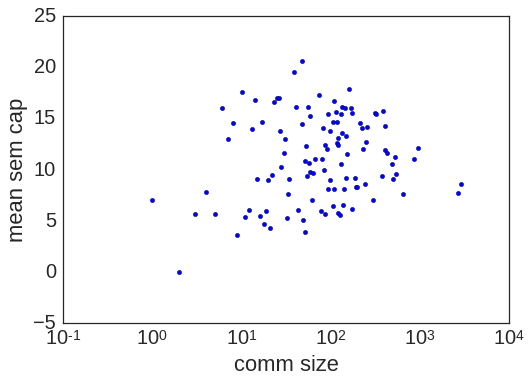

In [14]:
scatterplot_avg_SEM_CAP_per_COMM_size()

# Entities, concepts, taxonomies etc.


In [12]:
##################################################
# read in a map for the twitter username --> id
##################################################
def read_user_IDs():

    user_ids = defaultdict(str)

    with codecs.open('../user_IDs.dat','r', encoding='utf8') as f:
        for line in f:
            line = line.split()
            user_id = line[0]
            user =  line[1]
            user_ids[user] = int(user_id)

    return user_ids

In [13]:
def plot_taxonomy(tokens, weights, max_tokens, tokens_name, COM='ALL'):
    df = pd.DataFrame({'token': tokens, 'weight': weights})
    df.sort('weight', inplace=True, ascending=False)
    if df.shape[0] > max_tokens:
        tail = df.ix[max_tokens:, 'weight'].sum()
        df2 = df.iloc[0:max_tokens].copy()
        nrow = pd.Series({'token': '--[other ' + tokens_name + ']--', 'weight': tail})
        df2.ix[df2.shape[0]] = nrow
        df2.index = np.arange(df2.shape[0])
    else:
        df2 = df
        
    # Let's plot something better than a word cloud!

    plt.figure(figsize=(10,5))
    plt.title('community ' + COM)
    colors = []
    for c in range(df2.shape[0]-1):
        colors.append('#383838')
    colors.append('#ebe728')
    plt.barh(df2.index * -1, np.log(df2['weight']), color=colors)
    plt.gca().yaxis.grid(False)
    plt.yticks(df2.index * -1 + 1.0, df2['token'])
    plt.ylim(-1 * df2.shape[0] + 1.4, 1)
    plt.xlabel(tokens_name + ' weight')
    plt.savefig(COM+tokens_name+'.jpg', bbox_inches='tight')
    if tokens_name == 'entity':
        plt.show()

In [14]:
##################################################
# the core function for the user lists, comm etc.
##################################################
"""
    here, the options are to visualize the taxonomy for the whole dataset (COM="ALL")
    and to visualize for different communities (COM="COM") that are read in through read_in_communities()
    in the case of communities, this functions is invoked once per each community
    -- user_list holds the ids of the users in one community
    -- TOP_N holds the number of top concepts, keywords and entities that we want to visualize and record
    -- user_com holds a map for user_id --> com_id
    -- N_COM holds the total number of communities found (changes depending on the community detection algorithm)
"""
def find_taxonomy_of_user_list(user_ids=read_user_IDs(), COM='ALL', user_list=None, TOP_N=20):

    # resulting dictionaries in which the counts and tfidf relevance are collected
    keywords_sum = defaultdict(int)
    entities_sum = defaultdict(int)
    concepts_sum = defaultdict(int)
    taxonomies_sum = defaultdict(int) 
    
    docSentiment_sum = defaultdict(int)
    
    #print len(user_list), COM

    cnt = 0
    with codecs.open('../tweets_taxonomy_clean.JSON','r', encoding='utf8') as input_file:
        for line7s in input_file:
            try:
                line = json.loads(line7s)
                user_name = line["_id"]
                user_name = str(user_name)
                user_id = user_ids[user_name]
                if user_list is not None:
                    if not user_id in user_list:
                        #print user_id
                        continue
                # if dealing with ALL, take all the users
                taxonomy_all = line["taxonomy"]
                keywords = taxonomy_all["keywords"]
                entities = taxonomy_all["entities"]
                concepts = taxonomy_all["concepts"] 
                taxonomy = taxonomy_all["taxonomy"] 
                #
                docSentiment = taxonomy_all["docSentiment"] 
                # this counts how many user we have analyzed
                cnt += 1
            except KeyError:
                #print line7s
                # we don't print since it is tested, there some 10% users for whom
                # the taxonomy was not successfuly downloaded and they would be listed here
                continue
            
            for el in keywords:
                category = el["text"]
                # if we first time encounter this keyword, add a dict for it in the result
                if not category in keywords_sum:
                    keywords_sum[category] = defaultdict(int)
                # we use this not so well coded part because tuples do not allow assignment
                old_relev = keywords_sum[category][0]
                old_cnt = keywords_sum[category][1]
                new_relev = old_relev + float(el["relevance"])
                new_cnt = old_cnt + 1
                keywords_sum[category] = (new_relev, new_cnt)

            for el in entities:
                entity = el["text"]
                if entity in ['#', '#MentionTo', 'twitter', 'Twitter']:
                    continue
                # if we first time encounter this entity, add a dict for it in the result
                if not entity in entities_sum:
                    entities_sum[entity] = defaultdict(int)
                # we use this not so well coded part because tuples do not allow assignment
                old_relev = entities_sum[entity][0]
                old_cnt = entities_sum[entity][1]
                new_relev = old_relev + float(el["relevance"])
                new_cnt = old_cnt + 1
                entities_sum[entity] = (new_relev, new_cnt, el["type"])

            for el in concepts:
                concept = el["text"]
                if concept in ['Trigraph', 'Gh', 'trigraph']:
                    continue
                # if we first time encounter this concept, add a dict for it in the result
                if not concept in concepts_sum:
                    concepts_sum[concept] = defaultdict(int)
                # we use this not so well coded part because tuples do not allow assignment
                old_relev = concepts_sum[concept][0]
                old_cnt = concepts_sum[concept][1]
                new_relev = old_relev + float(el["relevance"])
                new_cnt = old_cnt + 1
                concepts_sum[concept] = (new_relev, new_cnt)

            # a bit different procedure for extracting the sentiment
            sentiment = docSentiment["type"]
            if sentiment == "neutral":
                docSentiment_sum[sentiment] += 1
            else:
                if not sentiment in docSentiment_sum:
                    docSentiment_sum[sentiment] = defaultdict(int)
                old_score = docSentiment_sum[sentiment][0]
                old_cnt = docSentiment_sum[sentiment][1]
                old_mixed_cnt = docSentiment_sum[sentiment][2]
                try:
                    new_score = old_score + float(docSentiment["score"])
                except KeyError:
                    continue
                new_cnt = old_cnt + 1
                try:
                    new_mixed_cnt = old_mixed_cnt + int(docSentiment["mixed"])
                except KeyError:
                    continue
                docSentiment_sum[sentiment] = (new_score, new_cnt, new_mixed_cnt)


            for el in taxonomy:
                taxonomy_tree = el["label"]
                taxon = taxonomy_tree
                if not taxon in taxonomies_sum:
                    taxonomies_sum[taxon] = defaultdict(int)
                old_score = taxonomies_sum[taxon][0]
                old_cnt = taxonomies_sum[taxon][1]
                new_score = old_score + float(el["score"])
                new_cnt = old_cnt + 1
                taxonomies_sum[taxon] = (new_score, new_cnt)

        com_size = cnt
        # THIS IS A CONSTANT, because we know how many users there are in total after we did one ALL run
        N = 27665
        print "*** The user list %s ***" % COM
        print "Analyzed %d users out of total %d users " % (com_size, N)
        try:
            pos_users = docSentiment_sum["positive"][1]
            pos_score = docSentiment_sum["positive"][0]
        except TypeError:
            pos_users = 0
            pos_score = 0
        try:
            neg_users = docSentiment_sum["negative"][1]
            neg_score = docSentiment_sum["negative"][0]
        except TypeError:
            neg_users = 0
            neg_score = 0
        try:
            neu_users = docSentiment_sum["neutral"]
        except TypeError:
            neu_users = 0
        """
        print "___________________"
        print "Sentiment stats: positive %d users; negative %d users; and neutral %d " % (pos_users, neg_users, neu_users)
        print "Sentiment score: positive %f ; negative %f; and the sum sentiment %f " % (pos_score, neg_score, pos_score + neg_score)
        print "Overall positive sentiment pct is %f " % (float(pos_users)/com_size)
        print "___________________"
        print "Total keywords found ", len(keywords_sum)
        print "Total entities found ", len(entities_sum)
        print "Total concepts found ", len(concepts_sum)
        print "Total taxonomies on different levels found ", len(taxonomies_sum)
        print "___________________"
        """

        #####################
        ## STARTS plotting ##
        #####################
        
        #####################
        ##    KEYWORDS     ##
        #####################
        for kw in keywords_sum:
            tot_relev = keywords_sum[kw][0]
            tot_cnt = keywords_sum[kw][1]
            inv_kw_fq = 0 if tot_cnt == 0 else N/float(tot_cnt)
            tfidf = float(tot_relev * math.log(1.0 + inv_kw_fq))
            keywords_sum[kw] = (tot_relev, tot_cnt, tfidf)
        
        #print
        #print "Keywords (ordered by TF-IDF): [relevance, count, TF-IDF]"
        ord_keywords_sum2 = OrderedDict(sorted(keywords_sum.items(), key=lambda x: x[1][0], reverse = True))
        NN = len(ord_keywords_sum2.items())
        labels = np.empty([NN], dtype="<U26")
        sizes = np.empty([NN], dtype=float)
        sizes_tot = np.empty([NN], dtype=float)
        i = 0
        for el in ord_keywords_sum2:
            #print el.encode('utf-8'), ord_keywords_sum2[el]
            labels[i] = el
            sizes[i] = float(ord_keywords_sum2[el][1])
            sizes_tot[i] = float(ord_keywords_sum2[el][0])
            i += 1
            #if i == TOP_N:
            #    break

                
        plot_taxonomy(tokens=labels, weights=sizes_tot, max_tokens=TOP_N, tokens_name='keyword', COM=COM)
        #plot_taxonomy(labels, sizes_tot, "kw_com_" + str(COM) + ".png")
        plt.clf()
        #print

        #####################
        ##    ENTITIES     ##
        #####################
        for en in entities_sum:
            tot_relev = entities_sum[en][0]
            tot_cnt = entities_sum[en][1]
            inv_ent_fq = 0 if tot_cnt == 0 else N/float(tot_cnt)
            tfidf = tot_relev * math.log(1.0 + inv_ent_fq)
            entities_sum[en] = (tot_relev, tot_cnt, tfidf)  

        #print "Entities (sorted by TF-IDF): [relevance, count, TF-IDF]"
        ord_entities_sum2 = OrderedDict(sorted(entities_sum.items(), key=lambda x: x[1][0], reverse = True))
        NN = len(ord_keywords_sum2.items())
        labels = np.empty([NN], dtype="<U26")
        sizes = np.empty([NN], dtype=float)
        sizes_tot = np.empty([NN], dtype=float)
        i = 0
        for el in ord_entities_sum2:
            #print el.encode('utf-8'), ord_entities_sum2[el]
            labels[i] = el
            #print labels
            sizes_tot[i] = float(ord_entities_sum2[el][0])
            sizes[i] = float(ord_entities_sum2[el][2])
            i += 1
            #if i == TOP_N:
            #    break

        plot_taxonomy(tokens=labels, weights=sizes_tot, max_tokens=TOP_N, tokens_name='entity', COM=COM)
        plt.clf()
        #print

        #####################
        ##    CONCEPTS     ##
        #####################
        for conc in concepts_sum:
            tot_relev = concepts_sum[conc][0]
            tot_cnt = concepts_sum[conc][1]
            inv_fq = 0 if tot_cnt == 0 else N/float(tot_cnt)
            tfidf = float(tot_relev * math.log(1.0 + inv_fq))
            concepts_sum[conc] = (tot_relev, tot_cnt, tfidf)

        #print "Concepts (sorted by TF-IDF): [relevance, count, TF-IDF]"
        ord_concepts_sum = OrderedDict(sorted(concepts_sum.items(), key=lambda x: x[1][0], reverse = True))
        NN = len(ord_keywords_sum2.items())
        labels = np.empty([NN], dtype="<U26")
        sizes = np.empty([NN], dtype=float)
        sizes_tot = np.empty([NN], dtype=float)
        i = 0
        for el in ord_concepts_sum:
            #print el.encode('utf-8'), ord_concepts_sum[el]
            labels[i] = el
            sizes[i] = float(ord_concepts_sum[el][2])
            sizes_tot[i] = float(ord_concepts_sum[el][0])
            i += 1
            #if i == TOP_N:
            #    break

        plot_taxonomy(tokens=labels, weights=sizes_tot, max_tokens=TOP_N, tokens_name='concept', COM=COM)
        #plot_pie(labels, sizes_tot, "concept_" + str(COM) + ".png")
        plt.clf()
        #print

        #####################
        ##   TAXONOMIES    ##
        #####################
        for taxon in taxonomies_sum:
            tot_score = taxonomies_sum[taxon][0]
            tot_cnt = taxonomies_sum[taxon][1]
            inv_fq = 0 if tot_cnt == 0 else N/float(tot_cnt)
            tfidf = float(tot_score * math.log(1.0 + inv_fq))
            taxonomies_sum[taxon] = (tot_score, tot_cnt, tfidf)


        #print "Taxonomies (sorted by TF-IDF): [relevance, count, TF-IDF]"
        ord_taxonomies_sum = OrderedDict(sorted(taxonomies_sum.items(), key=lambda x: x[1][0], reverse = True))
        NN = len(ord_keywords_sum2.items())
        labels = np.empty([NN], dtype="<U26")
        sizes = np.empty([NN], dtype=float)
        sizes_tot = np.empty([NN], dtype=float)
        i = 0
        for el in ord_taxonomies_sum:
            #print el.encode('utf-8'), ord_taxonomies_sum[el]
            labels[i] = el
            sizes[i] = float(ord_taxonomies_sum[el][2])
            sizes_tot[i] = float(ord_taxonomies_sum[el][0])
            i += 1
            #if i == TOP_N:
            #    break

        plot_taxonomy(tokens=labels, weights=sizes_tot, max_tokens=TOP_N, tokens_name='taxonomy', COM=COM)
        #plot_pie(labels, sizes_tot, "taxon_" + str(COM) + ".png")
        plt.clf()
        #print

In [15]:
def main(sizeN='ALL'):

    if sizeN == "ALL":
        #sys.stdout = open('../ALL/top_20_stats', 'w')
        find_taxonomy_of_user_list()
    else:
        #sys.stdout = open('Modularity_taxonomy_stats_' + f_in_Modularity_output_comm + '.txt', 'w')
        top_communities = read_in_top_communities(sizeN)
        #print len(top_communities), "top communities found of size", str(sizeN)

        for community in top_communities:
            # user_ids=read_user_IDs(), COM='ALL', user_list=None, TOP_N=20
            find_taxonomy_of_user_list(user_ids=read_user_IDs(), COM=str(community), user_list=top_communities[community], TOP_N=20)


*** The user list 171 ***
Analyzed 2866 users out of total 27665 users 


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  This is separate from the ipykernel package so we can avoid doing imports until


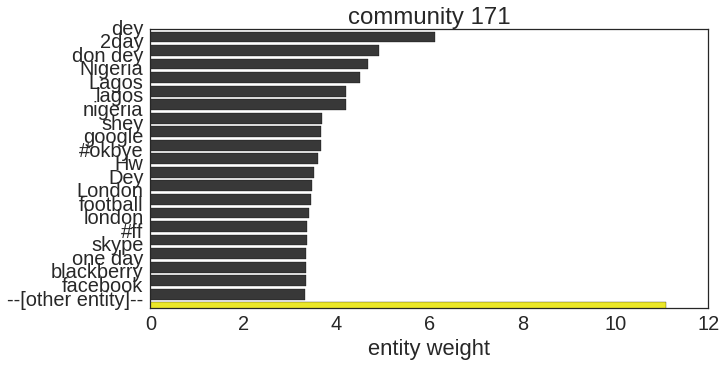

*** The user list 758 ***
Analyzed 2195 users out of total 27665 users 


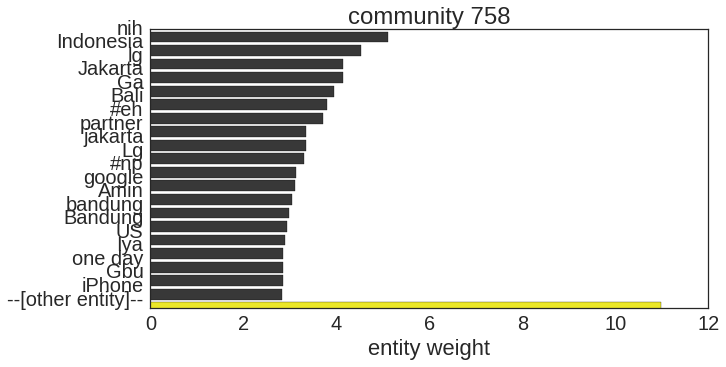

*** The user list 458 ***
Analyzed 934 users out of total 27665 users 


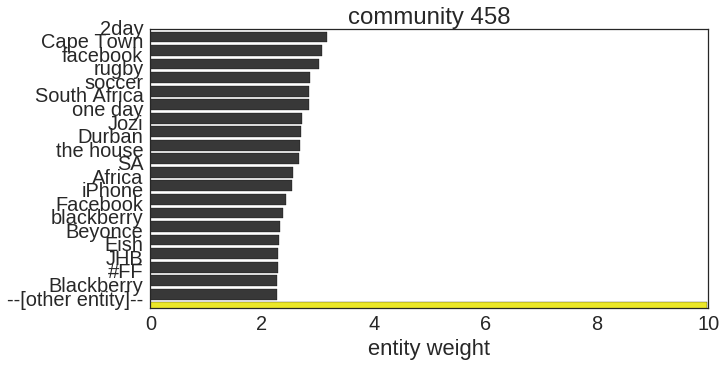

*** The user list 862 ***
Analyzed 863 users out of total 27665 users 


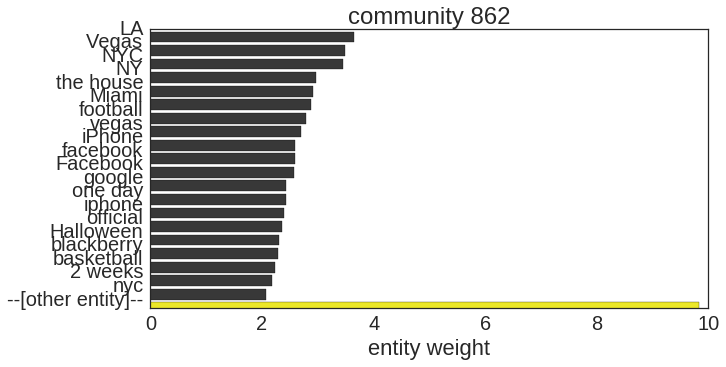

*** The user list 1505 ***
Analyzed 637 users out of total 27665 users 


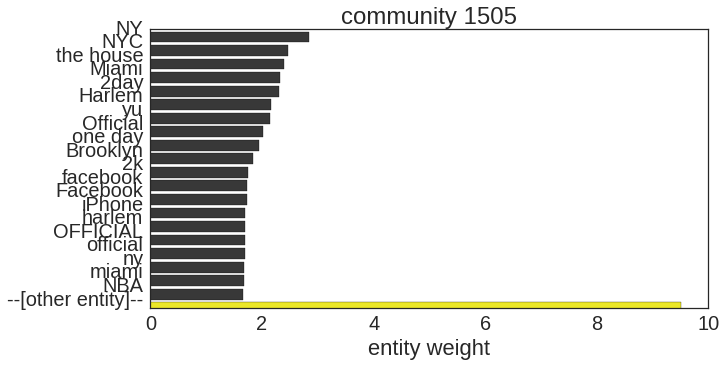

*** The user list 549 ***
Analyzed 543 users out of total 27665 users 


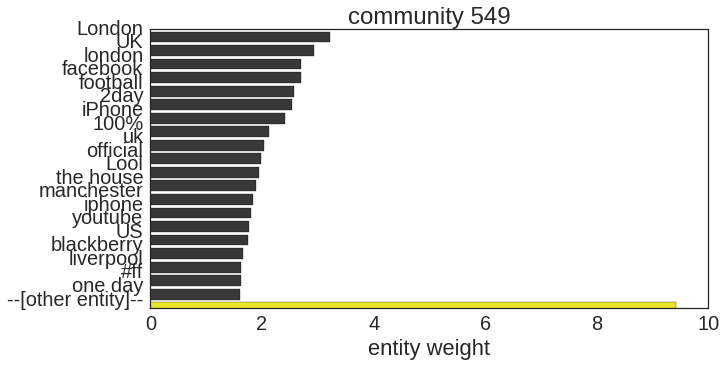

*** The user list 243 ***
Analyzed 506 users out of total 27665 users 


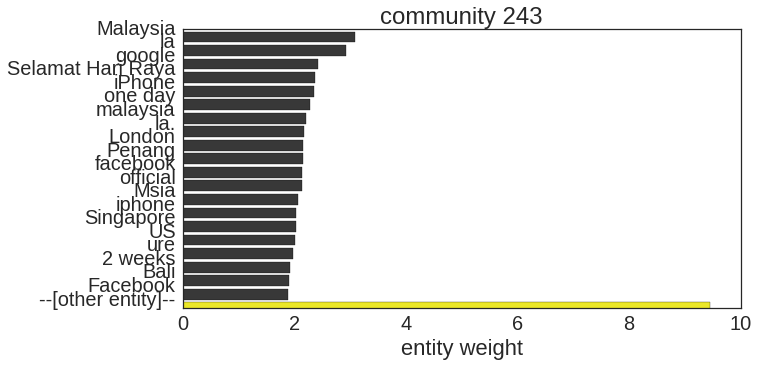

*** The user list 651 ***
Analyzed 500 users out of total 27665 users 


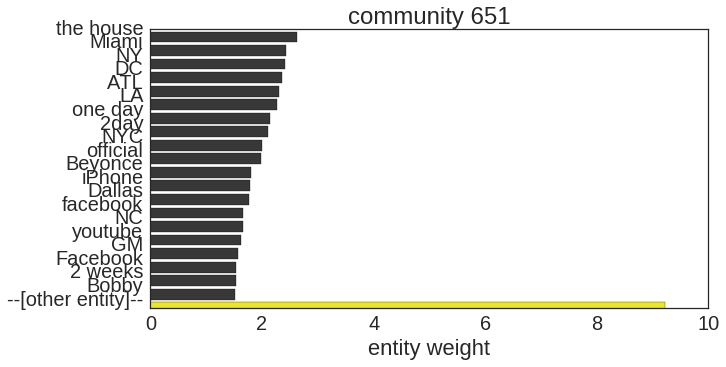

*** The user list 191 ***
Analyzed 485 users out of total 27665 users 


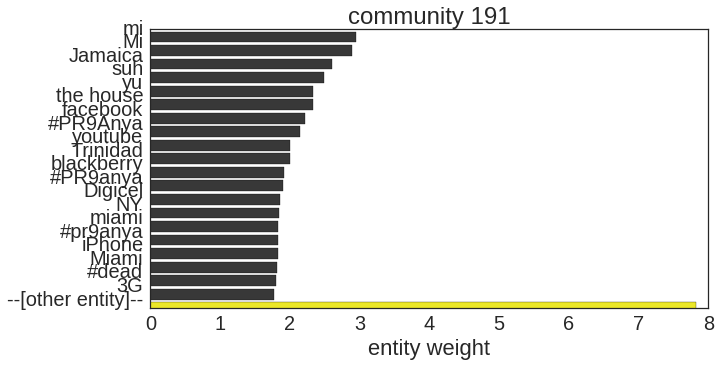

*** The user list 453 ***
Analyzed 429 users out of total 27665 users 


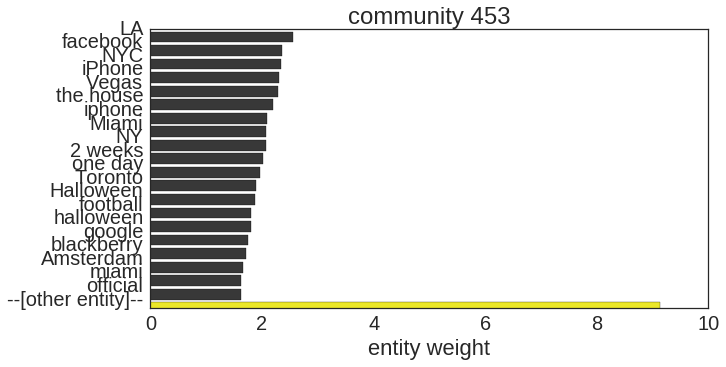

*** The user list 1596 ***
Analyzed 404 users out of total 27665 users 


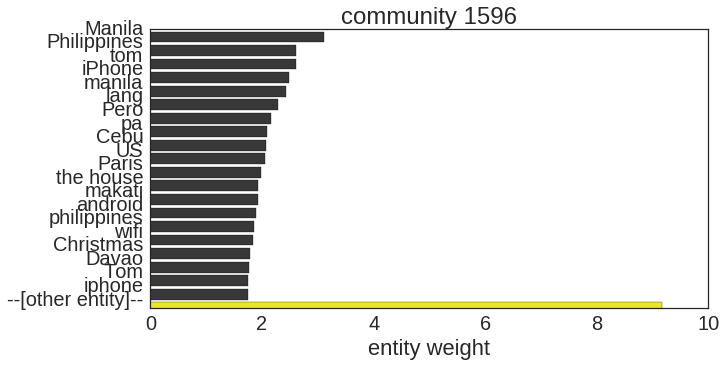

In [16]:
main(sizeN=400)